# 의사결정나무(Decision Tree)
![image](https://velog.velcdn.com/images/ppippi/post/8cde1ee1-5971-4cf1-8ea9-eeb5d6c36565/image.png)

## 개요
- 데이터를 잘 분류할 수 있는 질문을 던져 대상을 좁히는 형식의 알고리즘
- 추론 결과를 위해 분기해 나가는 구조가 Tree 구조와 같기 때문에 Decision Tree라고 한다
    - 노드안의 원소들의 불순도를 최대한 감소하는 방향(최대한 한 class의 값들만 있는 상태)으로 학습을 진행
    - 하위노드는 yes/no 두개로 분기
    - **분기 기준**
        - **분류**: 가장 불순도를 낮출 수 있는 조건을 찾아 분기
        - **회귀**: 가장 오차가 적은 조건을 찾아 분기
- 머신러닝 모델 중 몇 안되는 White box 모델로 추론 결과에 대한 해석이 가능
- 과대적합(Overfitting)이 발생하기 쉬움
- 앙상블 기반의 알고리즘인 랜덤보레스트와 많은 부스팅(Boosting)기반 앙상블 모델들의 기반 알고리즘으로 사용

> **순도(purity)/불순도(impurity)**
> - 서로 다른 종류의 값들이 섞여 있는 비율
> - 한 종류(class)의 값이 많을수록 순도가 높고 불순도가 낮다

## 용어
- Root Node: 시작 node
- Decision Node (Intermediate Node): 중간 node
- Leaf Node(Terminal Node): 마지막 단계(트리의 끝)에 있는 노드로 최종결과를 가짐

## 과대적합(Overfitting) 문제
- 모든 데이터셋이 모두 잘 분류되어 불순도가 0이 될때까지 분기해 나감
- Root에서 부터 하위 노드가 많이 만들어 질 수록 모델이 복잡해져 과대적합이 발생할 수 있다.
- 과대적합을 막기 위해서는 적당한 시점에 하위노드가 더이상 생성되지 않도록 해야한다.
    - 하위 노드가 더이상 생성되지 않도록 하는 것을 **가지치기(Pruning)** 라고 함

## 하이퍼파라미터
- **max_depth**
    - 트리의 최대 깊이(질문 단계)를 정의
    - 기본값: None - 깊이 제한 없이 완벽히 분할될 때 까지 분기
        - 분류: 불순도가 0이 될 때 까지, 회귀: MSE가 0이 될 때 까지
- **max_leaf_nodes**
    - Leaf Node 개수 제한
    - 기본값: None - 제한 없음
    - ex) max_leaf_nodes = 10 -> 전체 Tree의 leaf node가 최대 10개를 넘을 수 있다
- **min_samples_leaf**
    - Leaf Node가 가져야 하는 최소한의 sample(데이터) 수를 지정
    - 개수를 지정할 수 있고(정수), 전체 샘플 대비 비율로 지정(0.0 ~ 0.5 실수)할 수 있다.
        - ex) min_sample_leaf = 5 -> 모든 leaf node는 최소한 5개 데이터를 가져야한다. 그래서 5개가 되면 더 이상 분기하지 않는다
    - 기본값 : 1 -> 제한이 없다
- **max_features**
    - 분기할 때마다 지정한 개수의 Feature(특성)만 사용
    - 다음 값 중 선택
        - None(기본값): 전체 Feature를 다 사용한다
        - 정수: 개수를 지정
        - 0 ~ 1 사이 실수: 전체 개수 대비 비율
        - "sqrt": 전체 특성개수의 제곱근 개수만큼만 사용
        - "log2": "log2": $\log _{2} {Feature개수}$ 만큼만 사용
        - Feature가 25개일 경우
            - 'sqrt' 는 $\sqrt{25}=5$ 이므로 5개 Feature를 사용
            - 'log2' 는 $\log_{2} 25=4.64$ 이므로 5개 특성 사용
- **min_samples_split**
    - 분할하기 위해 필요한 최소 샘플수를 정의. 정의한 개수보다 더 적은 샘플을 가진 노드는 더이상 분기 되지 않는다
        - 기본값: 2
        - ex) min_samples_split = 10 -> sample 수가 10 미만인 노드는 더이상 분기되지 않는다
- **criterion**
    - 각 노드의 불순도 계산 방식을 정의
    - 분류
        - "gini"(기본값), "entropy"
    - 회귀
        - "squared_error"(기본값), "absolute_error", "friedman_mse", "poisson"

## Feature(컬럼) 중요도 조회
- **feature_importances_** 속성
    - 모델을 학습 결과를 기반으로 각 Feature 별 중요도를 반환
    - 전처리 단계에서 input data에서 중요한 feature들을 선택할 때 decision tree를 이용

## Wine Dataset을 이용한 color 분류

- https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- features
    - 와인 화학성분들
        - fixed acidity : 고정 산도
        - volatile acidity : 휘발성 산도
        - citric acid : 시트르산
        - residual sugar : 잔류 당분
        - chlorides : 염화물
        - free sulfur dioxide : 자유 이산화황
        - total sulfur dioxide : 총 이산화황
        - density : 밀도
        - pH : 수소 이온 농도
        - sulphates : 황산염
        - alcohol : 알콜
    - quality: 와인 등급 (A>B>C)
- target - color
    - 0: white, 1: red

### 데이터셋 로딩

In [2]:
import pandas as pd
wine = pd.read_csv('data/wine.csv')
wine.shape

(6497, 13)

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,C,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,C,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,C,1


In [5]:
# target의 구성
wine['color'].value_counts()

0    4898
1    1599
Name: color, dtype: int64

In [6]:
wine['color'].value_counts(normalize = True)

0    0.753886
1    0.246114
Name: color, dtype: float64

In [7]:
wine['quality'].value_counts()

B    2836
C    2384
A    1277
Name: quality, dtype: int64

### 데이터셋 분리 및 전처리

In [8]:
# X, y 분리
y = wine['color']
X = wine.drop('color', axis = 1)
X.shape, y.shape

((6497, 12), (6497,))

### 전처리
- 범주형 타입은 **quality**에 대해 Label Encoding 처리

> - DecisionTree 계열 모델
>   - 범주형: Label Encoding, 연속형: Feature Scaling을 하지 않는다
> - 선형계열 모델(예측시 모든 Feature들을 한 연산에 넣어 예측)
>   - 범주형: One Hot Encoding, 연속형: Feature Scaling을 한다

In [9]:
# quality -> Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['quality'] = le.fit_transform(X['quality'])

In [10]:
le.classes_

array(['A', 'B', 'C'], dtype=object)

In [11]:
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2


### trian/test set 분리

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((5197, 12), (1300, 12))

### DecisionTreeClassifier 생성, 학습, 검증

In [13]:
from sklearn.tree import DecisionTreeClassifier
from metrics import print_metrics_classification

max_depth = None
tree = DecisionTreeClassifier(max_depth = max_depth, random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
print_metrics_classification(y_train, tree.predict(X_train), title='Train set 평가결과')

Train set 평가결과
정확도(accuracy): 0.9998075812969021
재현율/민감도(recall): 1.0
정밀도(precision): 0.99921875
F1-score: 0.9996092223524815


In [15]:
print_metrics_classification(y_test, tree.predict(X_test), title='Test set 평가결과')

Test set 평가결과
정확도(accuracy): 0.9823076923076923
재현율/민감도(recall): 0.965625
정밀도(precision): 0.9626168224299065
F1-score: 0.9641185647425897


### Graphviz를 이용해 tree구조 시각화

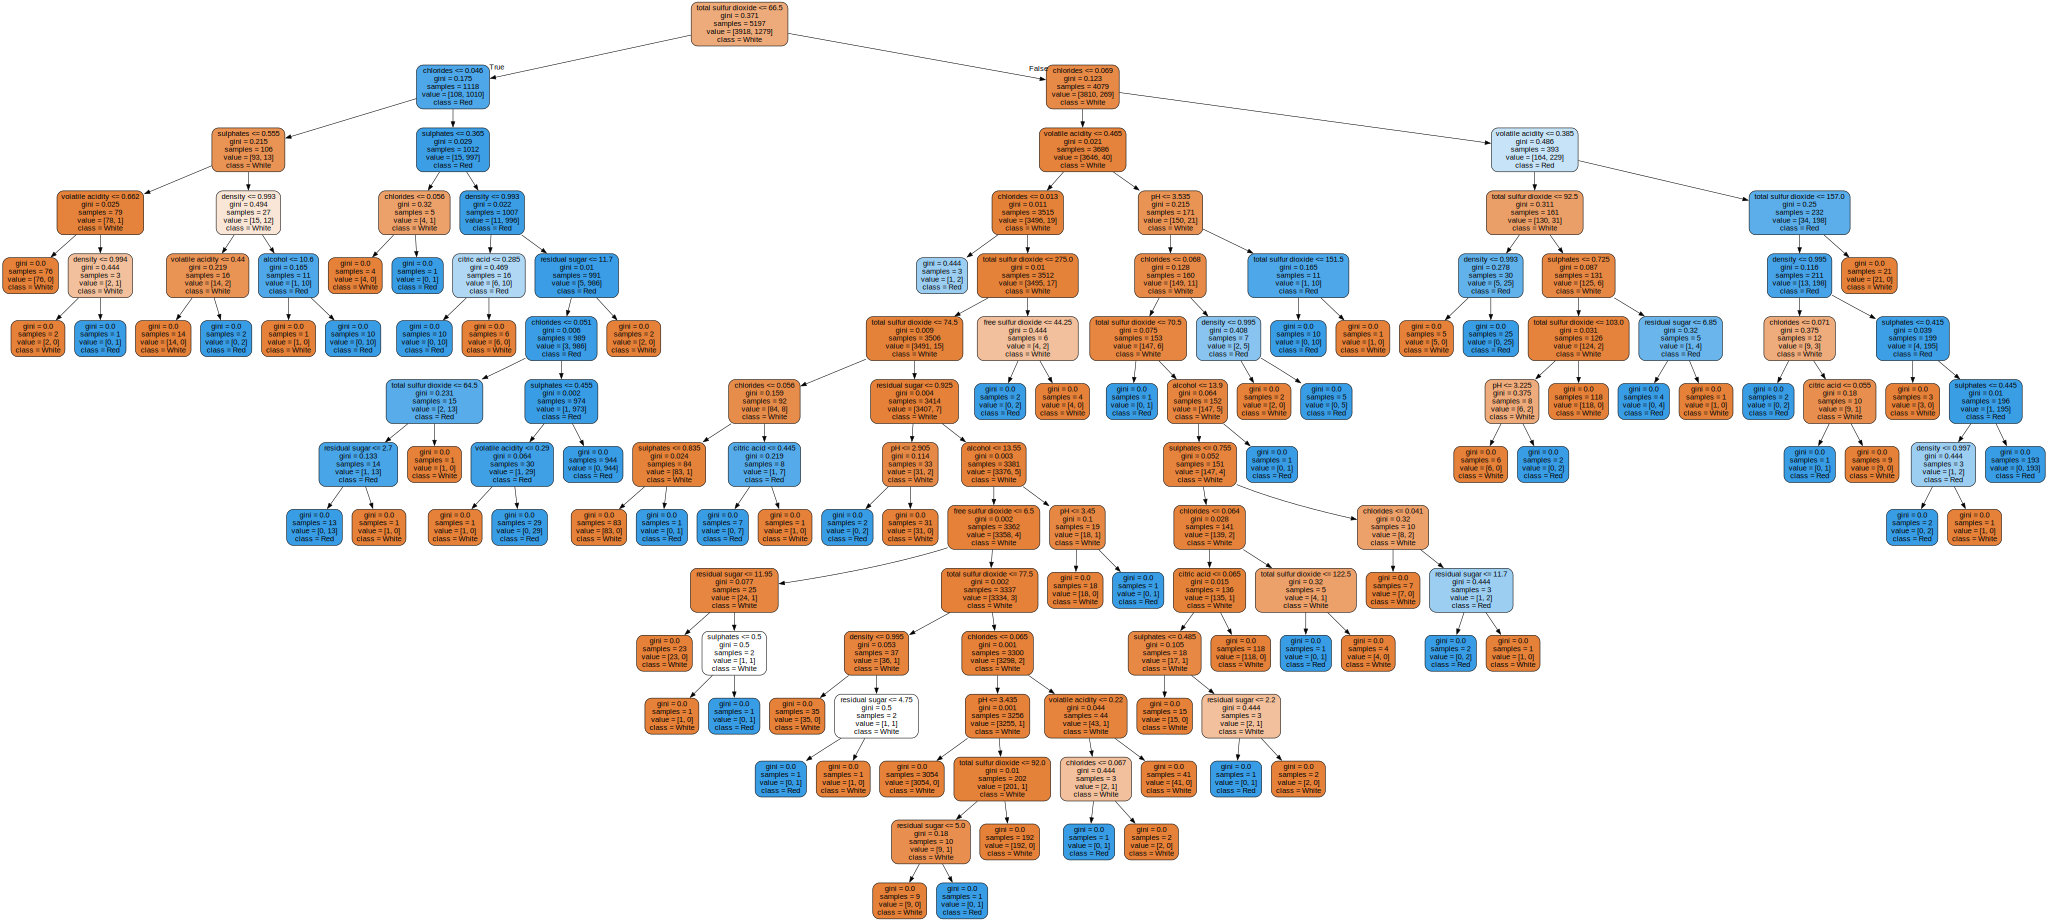

In [16]:
from sklearn.tree import export_graphviz
from graphviz import Source

ex = export_graphviz(tree,
                     feature_names = X_train.columns,
                     class_names = ['White', 'Red'],
                     rounded = True,
                     filled = True
                     )
graph = Source(ex)
graph

In [17]:
# 학습 결과 조회
print('depth:', tree.get_depth())
print('leaf node의 개수:', tree.get_n_leaves())

depth: 14
leaf node의 개수: 72


### Feature 중요도 조회
- 데이터 전처리 단계에서 추론에 전혀 도움 안되는 Feature들을 찾아낼 때 사용

In [18]:
tree.feature_importances_.sum()

0.9999999999999999

In [19]:
tree.feature_importances_

array([0.        , 0.04889081, 0.00578393, 0.00728546, 0.20914961,
       0.00142312, 0.67736867, 0.02033449, 0.01203758, 0.0157539 ,
       0.00197244, 0.        ])

In [20]:
fi = pd.Series(tree.feature_importances_, index = X_train.columns).sort_values(ascending = False)
fi

total sulfur dioxide    0.677369
chlorides               0.209150
volatile acidity        0.048891
density                 0.020334
sulphates               0.015754
pH                      0.012038
residual sugar          0.007285
citric acid             0.005784
alcohol                 0.001972
free sulfur dioxide     0.001423
fixed acidity           0.000000
quality                 0.000000
dtype: float64

## GridSearchCV 적용
- 가지치기(모델 복잡도 관련 규제) 파라미터 찾기
- max_depth, max_leaf_nodes, min_samples_leaf 최적의 조합을 GridSearch를 이용해 찾아본다.(accuracy기준)
- best_estimator_ 를 이용해서 feature 중요도를 조회
- best_estimator_를 이용해 graphviz로 구조를 확인

### 파라미터
- max_depth : 2 ~ 10
- max_leaf_nodes : 10 ~ 30, 5씩 증가 (10, 15, 20, 25, 30)
- min_samples_leaf : 10 ~ 200, 10씩 증가 (10, 20, 30, ..., 200)
- max_features = 0.5 ~ 1.0, 0.1씩 증가

### GridSearchCV 생성, 학습

In [21]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state = 0)
params = {
    'max_depth' : range(2, 11),
    'max_leaf_nodes' : range(10, 31, 5),
    'min_samples_leaf' : range(10, 201, 10),
    'max_features' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

gs = GridSearchCV(tree, params, scoring = 'accuracy', cv = 5, n_jobs = -1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(2, 11),
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'max_leaf_nodes': range(10, 31, 5),
                         'min_samples_leaf': range(10, 201, 10)},
             scoring='accuracy')

### 결과확인

In [22]:
print('best_param:', gs.best_params_)
print('best_score', gs.best_score_)

best_param: {'max_depth': 6, 'max_features': 0.9, 'max_leaf_nodes': 15, 'min_samples_leaf': 10}
best_score 0.9813337528688828


In [23]:
result = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
result.shape

(5400, 17)

In [24]:
result.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5220,0.019588,0.002244,0.003398,0.000489,10,0.9,15,10,"{'max_depth': 10, 'max_features': 0.9, 'max_le...",0.986538,0.984615,0.980751,0.973051,0.981713,0.981334,0.004625,1
4020,0.019987,0.001414,0.003199,0.000399,8,0.9,15,10,"{'max_depth': 8, 'max_features': 0.9, 'max_lea...",0.986538,0.984615,0.980751,0.973051,0.981713,0.981334,0.004625,1
2820,0.020588,0.001019,0.003399,0.000489,6,0.9,15,10,"{'max_depth': 6, 'max_features': 0.9, 'max_lea...",0.986538,0.984615,0.980751,0.973051,0.981713,0.981334,0.004625,1


In [25]:
best_model = gs.best_estimator_
print(best_model)

DecisionTreeClassifier(max_depth=6, max_features=0.9, max_leaf_nodes=15,
                       min_samples_leaf=10, random_state=0)


### Graphviz 확인

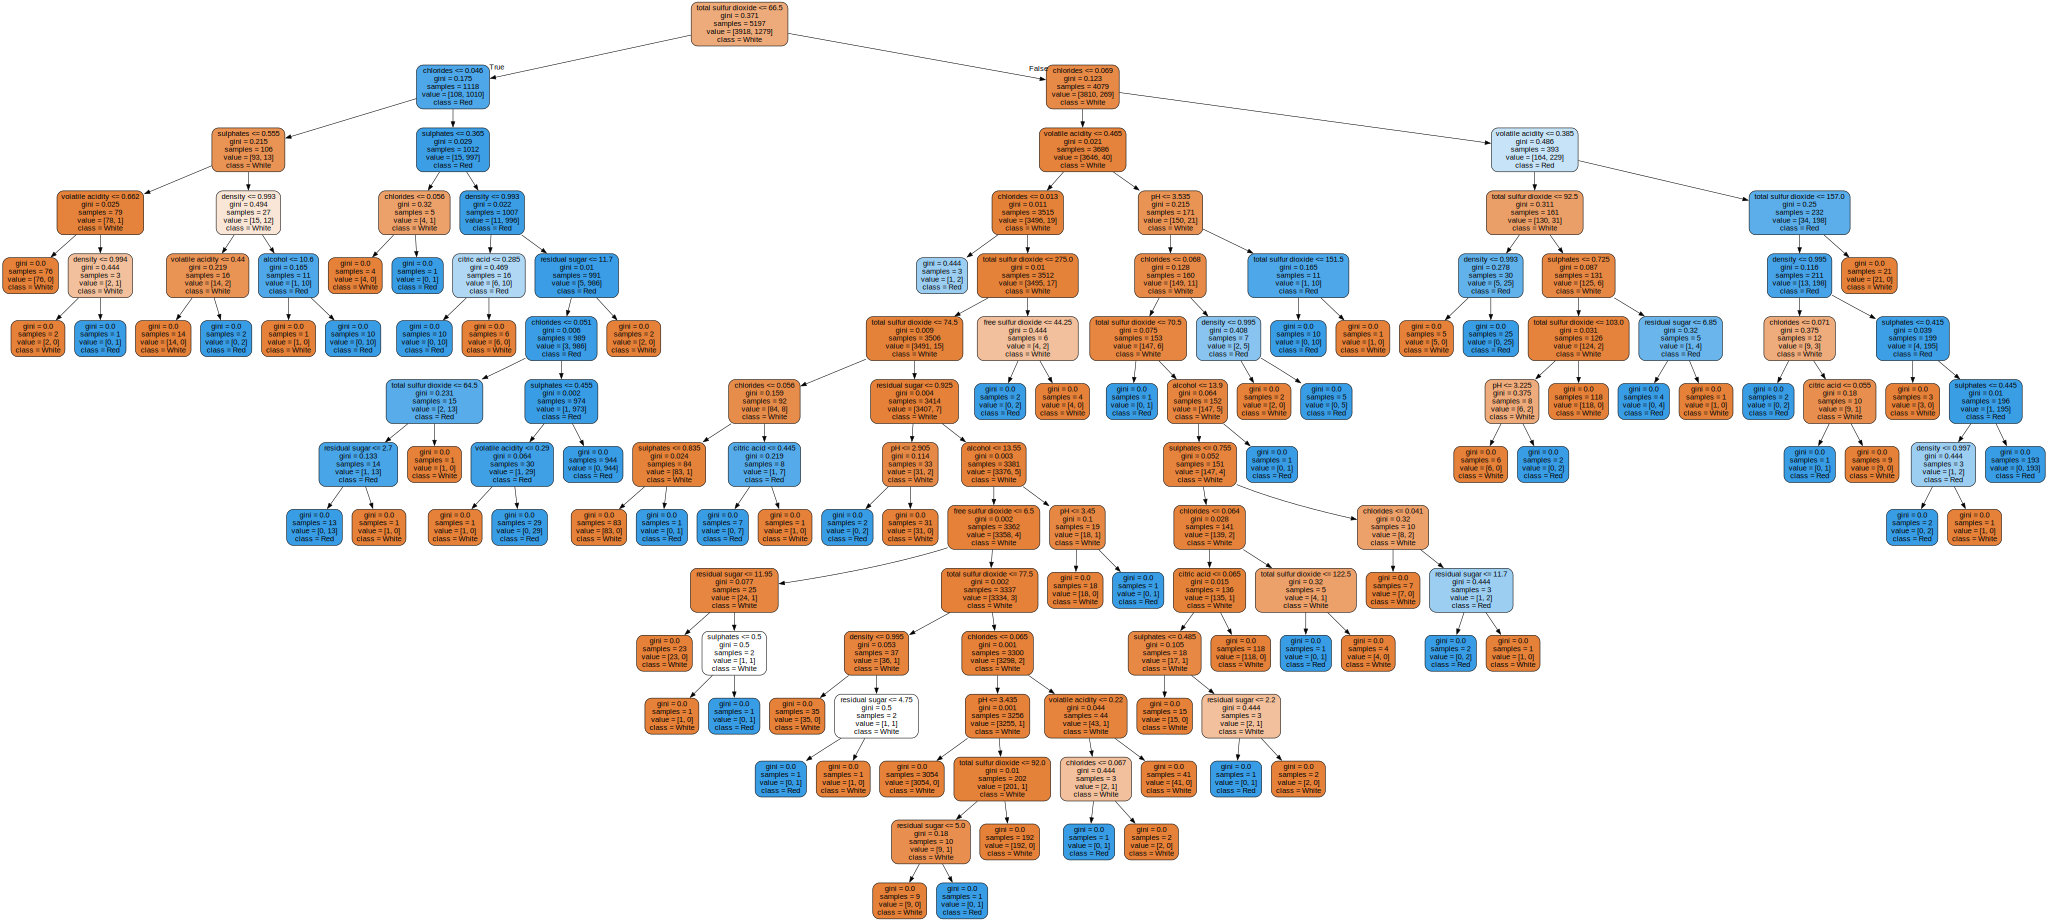

In [26]:
graph = export_graphviz(best_model,
                        feature_names = X_train.columns,
                        class_names = ['White', 'Red'],
                        rounded = True,
                        filled = True
                        )
graph = Source(ex)
graph

In [27]:
# 학습 결과 조회
print('depth:', best_model.get_depth())
print('leaf node의 개수:', best_model.get_n_leaves())

depth: 6
leaf node의 개수: 15


### Feature(컬럼) 중요도 조회

In [28]:
fi = pd.Series(best_model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
fi

total sulfur dioxide    0.716217
chlorides               0.100151
volatile acidity        0.094581
sulphates               0.065686
fixed acidity           0.009458
pH                      0.008547
density                 0.005360
citric acid             0.000000
residual sugar          0.000000
free sulfur dioxide     0.000000
alcohol                 0.000000
quality                 0.000000
dtype: float64

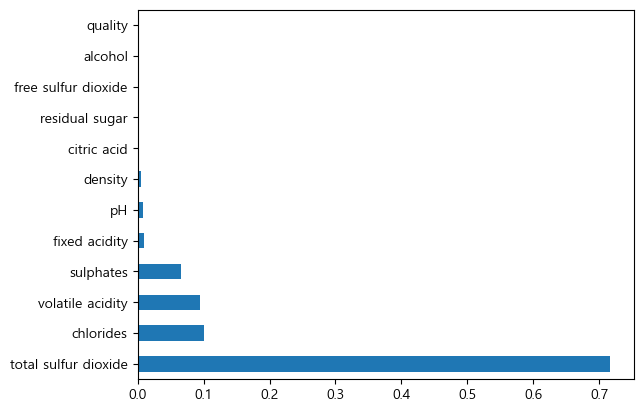

In [29]:
import matplotlib.pyplot as plt
fi.plot(kind = 'barh')
plt.show()

In [30]:
# 최종 테스트셋 평가
from sklearn.metrics import accuracy_score
accuracy_score(y_test, best_model.predict(X_test))

0.9838461538461538

# Ensemble(앙상블)
- 하나의 모델만을 학습시켜 사용하지 않고 여러 모델을 학습시켜 결합하는 방식으로 문제를 해결
- 개별로 학습한 여러 모델을 조합해 과적합을 막고 일반화 성능을 향상시킬 수 있다
- 개별 모델의 성능이 확보되지 않을 때 성능향상에 도움이 될 수 있다

## 앙상블의 종류
### 1. 투표방식
- 여러개의 추정기(Estimator)가 낸 결과들을 투표를 통해 최종 결과를 내는 방식
- 종류
    1. Bagging - 같은 유형의 알고리즘들을 조합하되 각각 학습하는 데이터를 다르게 한다
        - Random Forest가 Bagging을 기반으로 한다
    2. Voting - 서로 다른 종류의 알고리즘들을 결합한다

### 2. 부스팅(Boosting)
- 약한 학습기(Weak Learner)들을 결합해서 보다 정확하고 강력한 학습기(Strong Learner)를 만든다
- 각 약한 학습기들은 순서대로 일을 하며 뒤의 학습기들은 앞의 학습기가 찾지 못한 부분을 추가적으로 찾는다

## Random Forest(랜덤포레스트)
- Bagging 방식의 앙상블 모델
- Decision Tree를 기반으로 한다
- 다수의 Decision Tree를 사용해서 성능을 올린 앙상블 알고리즘의 하나
    - N개의 Decision Tree를 생성하고 입력 데이터를 각각 추론하게 한 뒤 가장 많이 나온 추론결과를 최종결과로 결정
- 처리속도가 빠르며 성능도 높은 모델로 알려짐
> - Random : 학습할 때 Train dataset을 random하게 sampling한다
> - Forest : 여러개의 (Decision) Tree 모델들을 앙상블한다

![image](https://blog.kakaocdn.net/dn/nHyF4/btqCvxAikNW/R0HqoJTrKmFK0c5Y7W4dk1/img.png)


### 랜덤포레스트의 절차
- 객체 생성시 DecisionTree의 개수, Dcision Tree에 대한 하이퍼파라미터들 등을 받아 생성
    - 모든 DecisionTree들은 같은 구조를 가지게 한다
- 학습시 모든 DecisionTree들이 서로 다른 데이터셋으로 학습하도록 Train dataset으로 부터 생성한 DecisionTree개수 만큼 sampling한다
    - **부트스트랩 샘플링**(중복을 허용하면서 랜덤하게 샘플링하는 방식)으로 데이터셋을 준비(총데이터의 수는 원래 데이터셋과 동일 하지만 일부는 누락되고 일부는 중복된다)
    - Sampling된 데이터셋들은 **전체 피처중 일부만** 랜덤하게 가지게 한다
- 각 트리별로 예측결과를 내고 분류의 경우 그 예측을 모아 다수결 투표로 클래스 결과를 낸다
- 회귀의 경우는 예측 결과의 평균을 낸다

### 주요 하이퍼파라미터
- n_estimators
    - DecisionTree 모델의 개수
    - 학습할 시간과 메모리가 허용하는 범위에서 클수록 좋다
- max_features
    - 각 트리에서 선택할 feature의 개수
    - 클수록 각 트리간의 feature 차이가 크고 작을수록 차이가 적게 난다
- DecisionTree의 하이퍼파라미터들
    - Tree의 최대 깊이, 가지를 치기 위한 최소 샘플 수 등 DecisionTree에서 과적합을 막기 위한 파라미터들을 랜덤 포레스트에 적용할 수 있다.

### 와인 데이터셋 color 분류

In [31]:
import pandas as pd

wine = pd.read_csv('data/wine.csv')
y = wine['color']
X = wine.drop(columns = 'color')

In [32]:
from sklearn.preprocessing import LabelEncoder

X['quality'] = LabelEncoder().fit_transform(X['quality'])

### train/test set 분리

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)
X_train.shape, X_test.shape

((5197, 12), (1300, 12))

### RandomForestClassifier 생성, 학습, 검증

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 500,
                             max_depth = 5, 
                             n_jobs = -1,
                             random_state = 0
                             )

In [35]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1, random_state=0)

### 추론

In [36]:
train_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)

train_proba = rfc.predict_proba(X_train)[:, 1]
test_proba = rfc.predict_proba(X_test)[:, 1]

### 평가

In [39]:
from metrics import print_metrics_classification as pmc1, print_metrics_classification2 as pmc2

pmc1(y_train, train_pred, title = 'Train set')
print('=' * 30)
pmc1(y_test, test_pred, title = 'Test set')

Train set
정확도(accuracy): 0.9948046950163556
재현율/민감도(recall): 0.980453479280688
정밀도(precision): 0.9984076433121019
F1-score: 0.9893491124260355
Test set
정확도(accuracy): 0.9938461538461538
재현율/민감도(recall): 0.975
정밀도(precision): 1.0
F1-score: 0.9873417721518987


In [40]:
pmc2(y_train, train_proba, 'Train set')
print('=' * 30)
pmc2(y_test, test_proba, 'Test set')

Train set
Average Precision: 0.9985288653885538
roc_auc: 0.9993943472140571
Test set
Average Precision: 0.9966606292846936
roc_auc: 0.997844387755102


### Feature importance

In [41]:
fi = pd.Series(rfc.feature_importances_, index = X_train.columns)
fi.sort_values(ascending = False)

total sulfur dioxide    0.305490
chlorides               0.281441
volatile acidity        0.124867
sulphates               0.058497
density                 0.056618
free sulfur dioxide     0.051224
fixed acidity           0.041889
residual sugar          0.041829
citric acid             0.016953
pH                      0.016257
alcohol                 0.004435
quality                 0.000500
dtype: float64